In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


E-Commerce Anomaly Detection Using Isolation Forest
Overview
E-commerce platforms are data-rich environments where understanding customer behavior and preferences is crucial for optimizing user experience, preventing fraud, and improving operational efficiency. This project implements an anomaly detection framework using the Isolation Forest algorithm to identify unusual patterns in Key Performance Indicators (KPIs) across multiple e-commerce sites.

Use Case
Managing multiple e-commerce sites with numerous KPIs poses significant challenges for companies. For large-scale platforms, where data is collected daily or hourly from various regions, manually monitoring every KPI across all sites is virtually impossible. This complexity makes it difficult to proactively identify issues that could impact sales, user experience, or website performance.

Problem Statement
Our e-commerce platform tracks various KPIs, such as:

Sales Volume
Conversion Rate
Cart Abandonment Rate
Page Views
Traffic Sources
Click-Through Rate
Checkout Completion Rate
Customer Return Rate
Average Order Value
Inventory Levels
Customer Acquisition Cost
Bounce Rate
Customer Lifetime Value
Return on Advertising Spend
Net Promoter Score
Payment Failure Rate
Session Duration
Customer Satisfaction Score
Email Open Rate
Product View to Purchase Rate
Promotional Code Usage
Mobile vs. Desktop Conversion Rates
Traffic by Device
Social Media Engagement
Market Basket Analysis
The goal is to automate the monitoring of these KPIs and identify the top 100,000 site-KPI combinations that exhibit major fluctuations or anomalies. This will allow the team to focus on significant issues that may require immediate attention, optimizing effort and resources.

Technical Approach
1. Data Generation
A synthetic dataset simulating the above KPIs across multiple e-commerce sites will be created. This dataset will include features such as:

site_id: Unique identifier for each site.
date: Date of the recorded data.
kpi_name: The name of the KPI.
kpi_value: The numerical value of the KPI for that day.
traffic_source: Source of traffic (e.g., organic, paid, direct).
device_type: Type of device used (e.g., desktop, mobile, tablet).
customer_segment: Segment of customers (e.g., new, returning).
promotion_flag: Indicates if a promotion was active on that day.
geography: Geographic region of the site.
seasonality: Indicates any seasonal effect on the data.
marketing_channel: Channel through which customers were acquired.
abandoned_cart_count: Number of carts abandoned that day.
successful_transaction_count: Count of successful transactions.
product_views: Total number of product views.
average_session_duration: Average time spent on the site.
user_engagement_score: Composite score of user engagement metrics.
2. Anomaly Detection
Data Preprocessing: Decompose each KPI time series into trend, seasonality, and noise components.

Threshold Establishment: Define thresholds for normal fluctuations (e.g., 1-2%). Values exceeding the thresholds (e.g., 5-10%) are flagged as anomalies.
Isolation Forest Implementation: Use the Isolation Forest algorithm to identify patterns of abnormal behavior across the KPI data. This model will continuously monitor KPIs, detecting sudden changes or unusual spikes.
3. Alerting and Reporting
Set up automated alerts to notify relevant teams when significant anomalies are detected.
Create dashboards to visualize trends, track anomalies, and provide actionable insights.
Expected Outcomes
Proactive Issue Identification: Quickly spot significant deviations in KPIs, allowing teams to address issues before they impact the business.
Enhanced Resource Allocation: By focusing on the top anomalies, the team can prioritize efforts on the most critical issues, improving efficiency.
Improved User Experience and Security: Detect and respond to unusual shopping patterns, enhancing overall user satisfaction and platform security.
Conclusion
This anomaly detection framework will help e-commerce platforms efficiently monitor their complex ecosystems, ensuring that significant performance issues are flagged promptly. By automating the detection process, resources can be focused on resolving the most impactful anomalies, ultimately driving better business outcomes.

In [13]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


         Date  Site_ID  Sales_Volume  Conversion_Rate  Average_Order_Value  \
0  2024-01-01        5          1307             0.01                  219   
1  2024-01-02        3          3732             0.08                  148   
2  2024-01-03        3          4462             0.05                  289   
3  2024-01-04        2          1982             0.04                   96   
4  2024-01-05        5          1370             0.05                  260   

   Cart_Abandonment_Rate  Customer_Lifetime_Value Traffic_Source  Bounce_Rate  \
0                   0.48                      546           Paid         0.37   
1                   0.45                      706       Referral         0.41   
2                   0.49                      266           Paid         0.24   
3                   0.47                      765           Paid         0.27   
4                   0.48                      465           Paid         0.30   

   Customer_Satisfaction_Score  ...  Mobile_

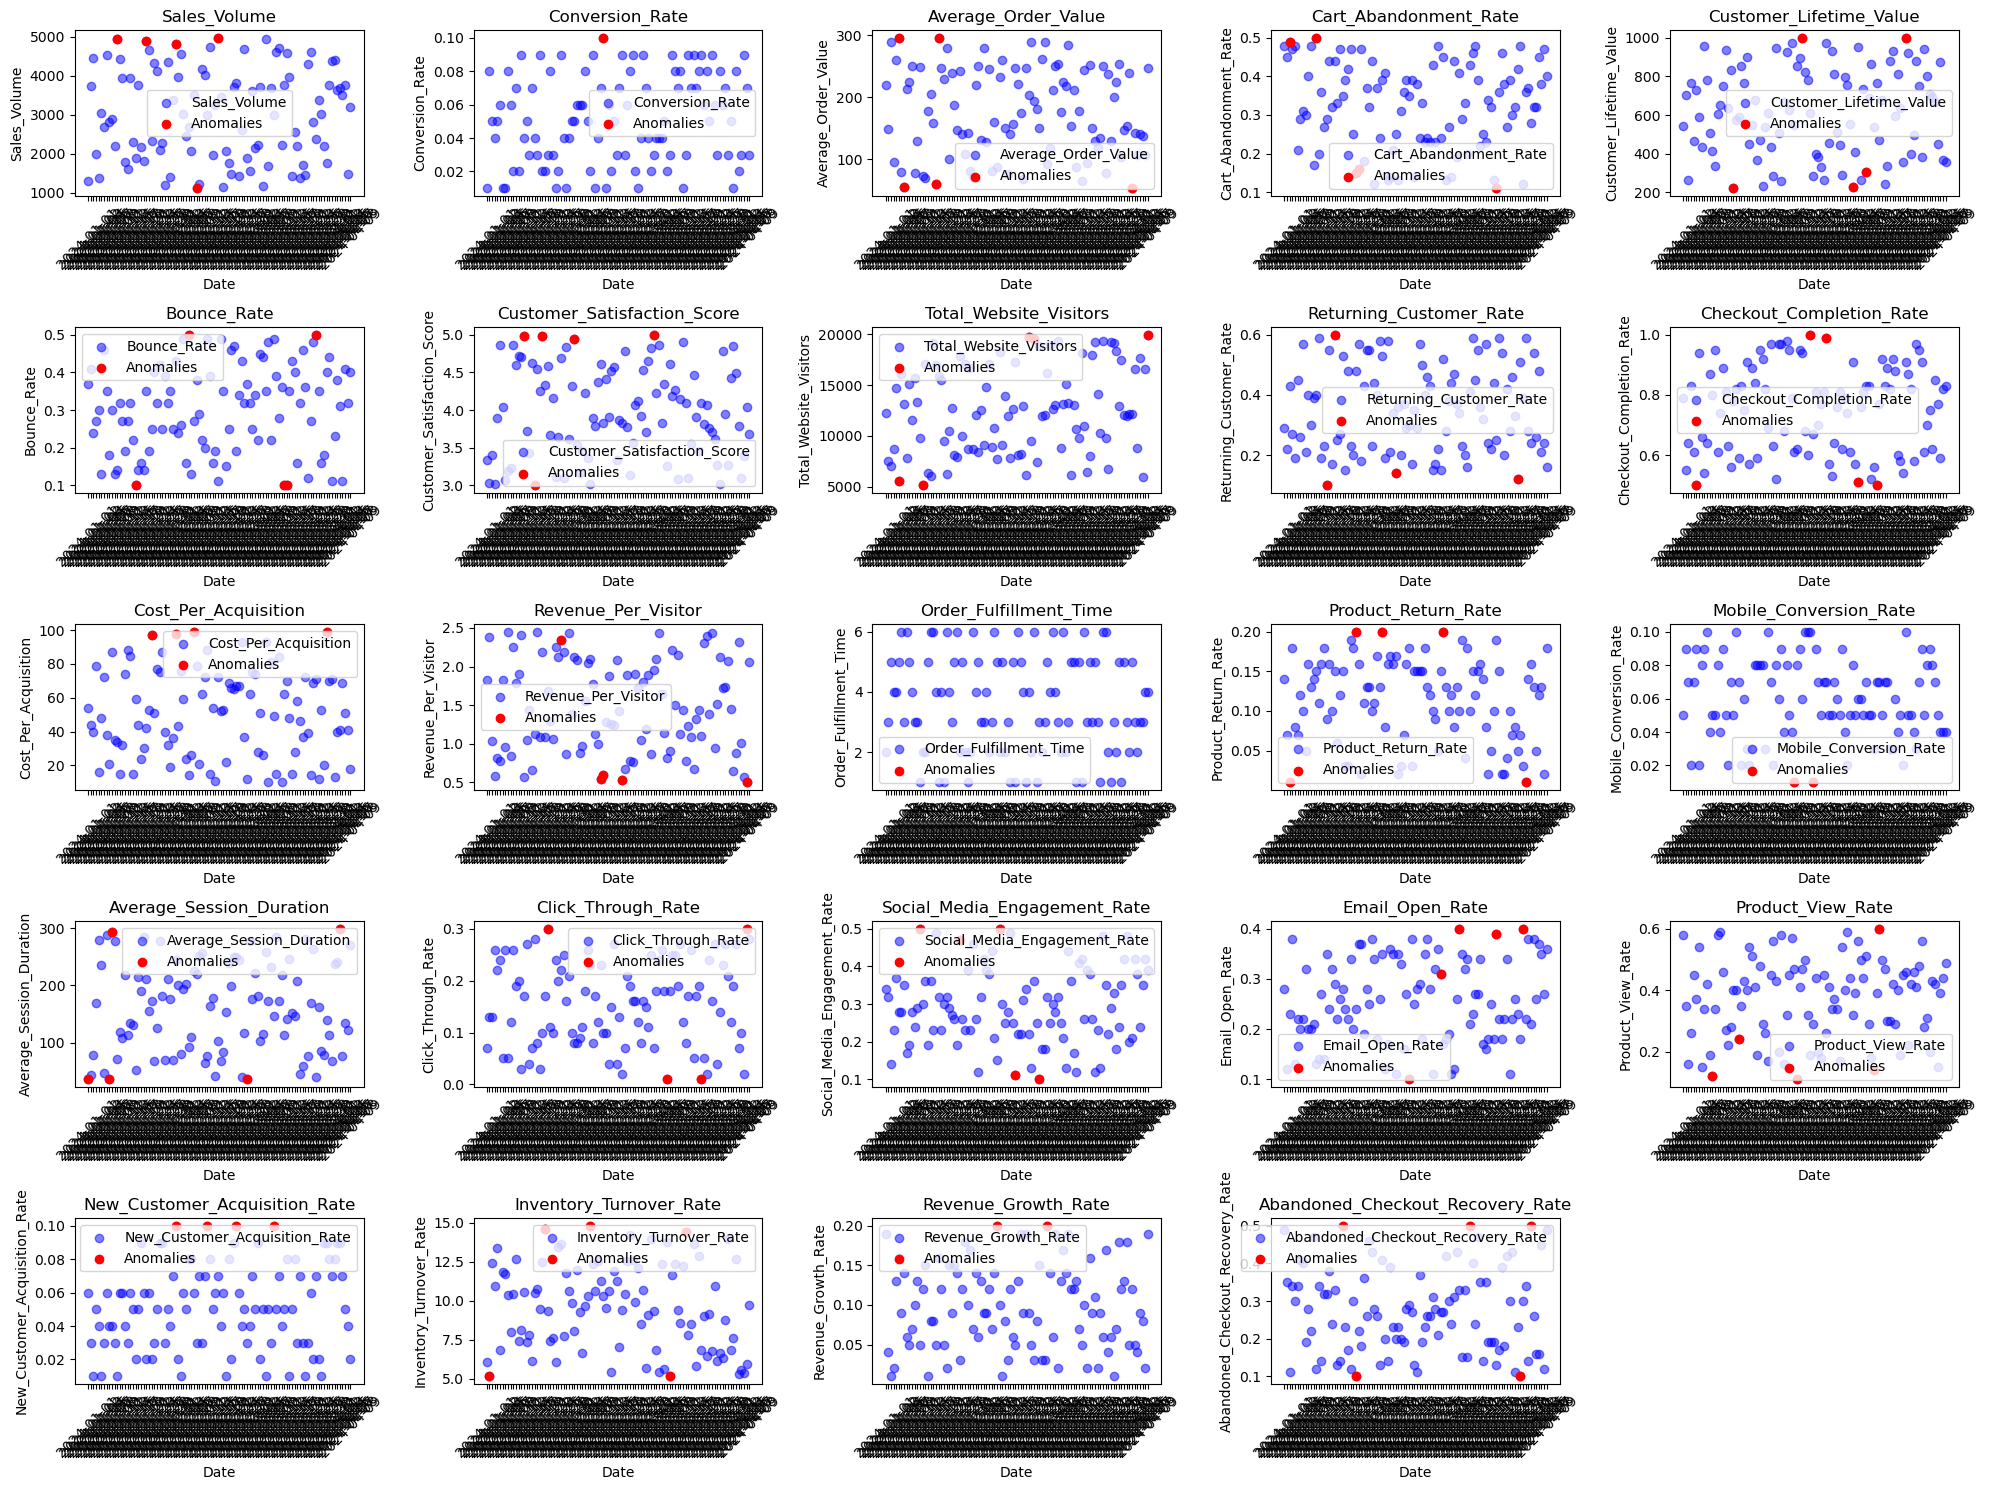

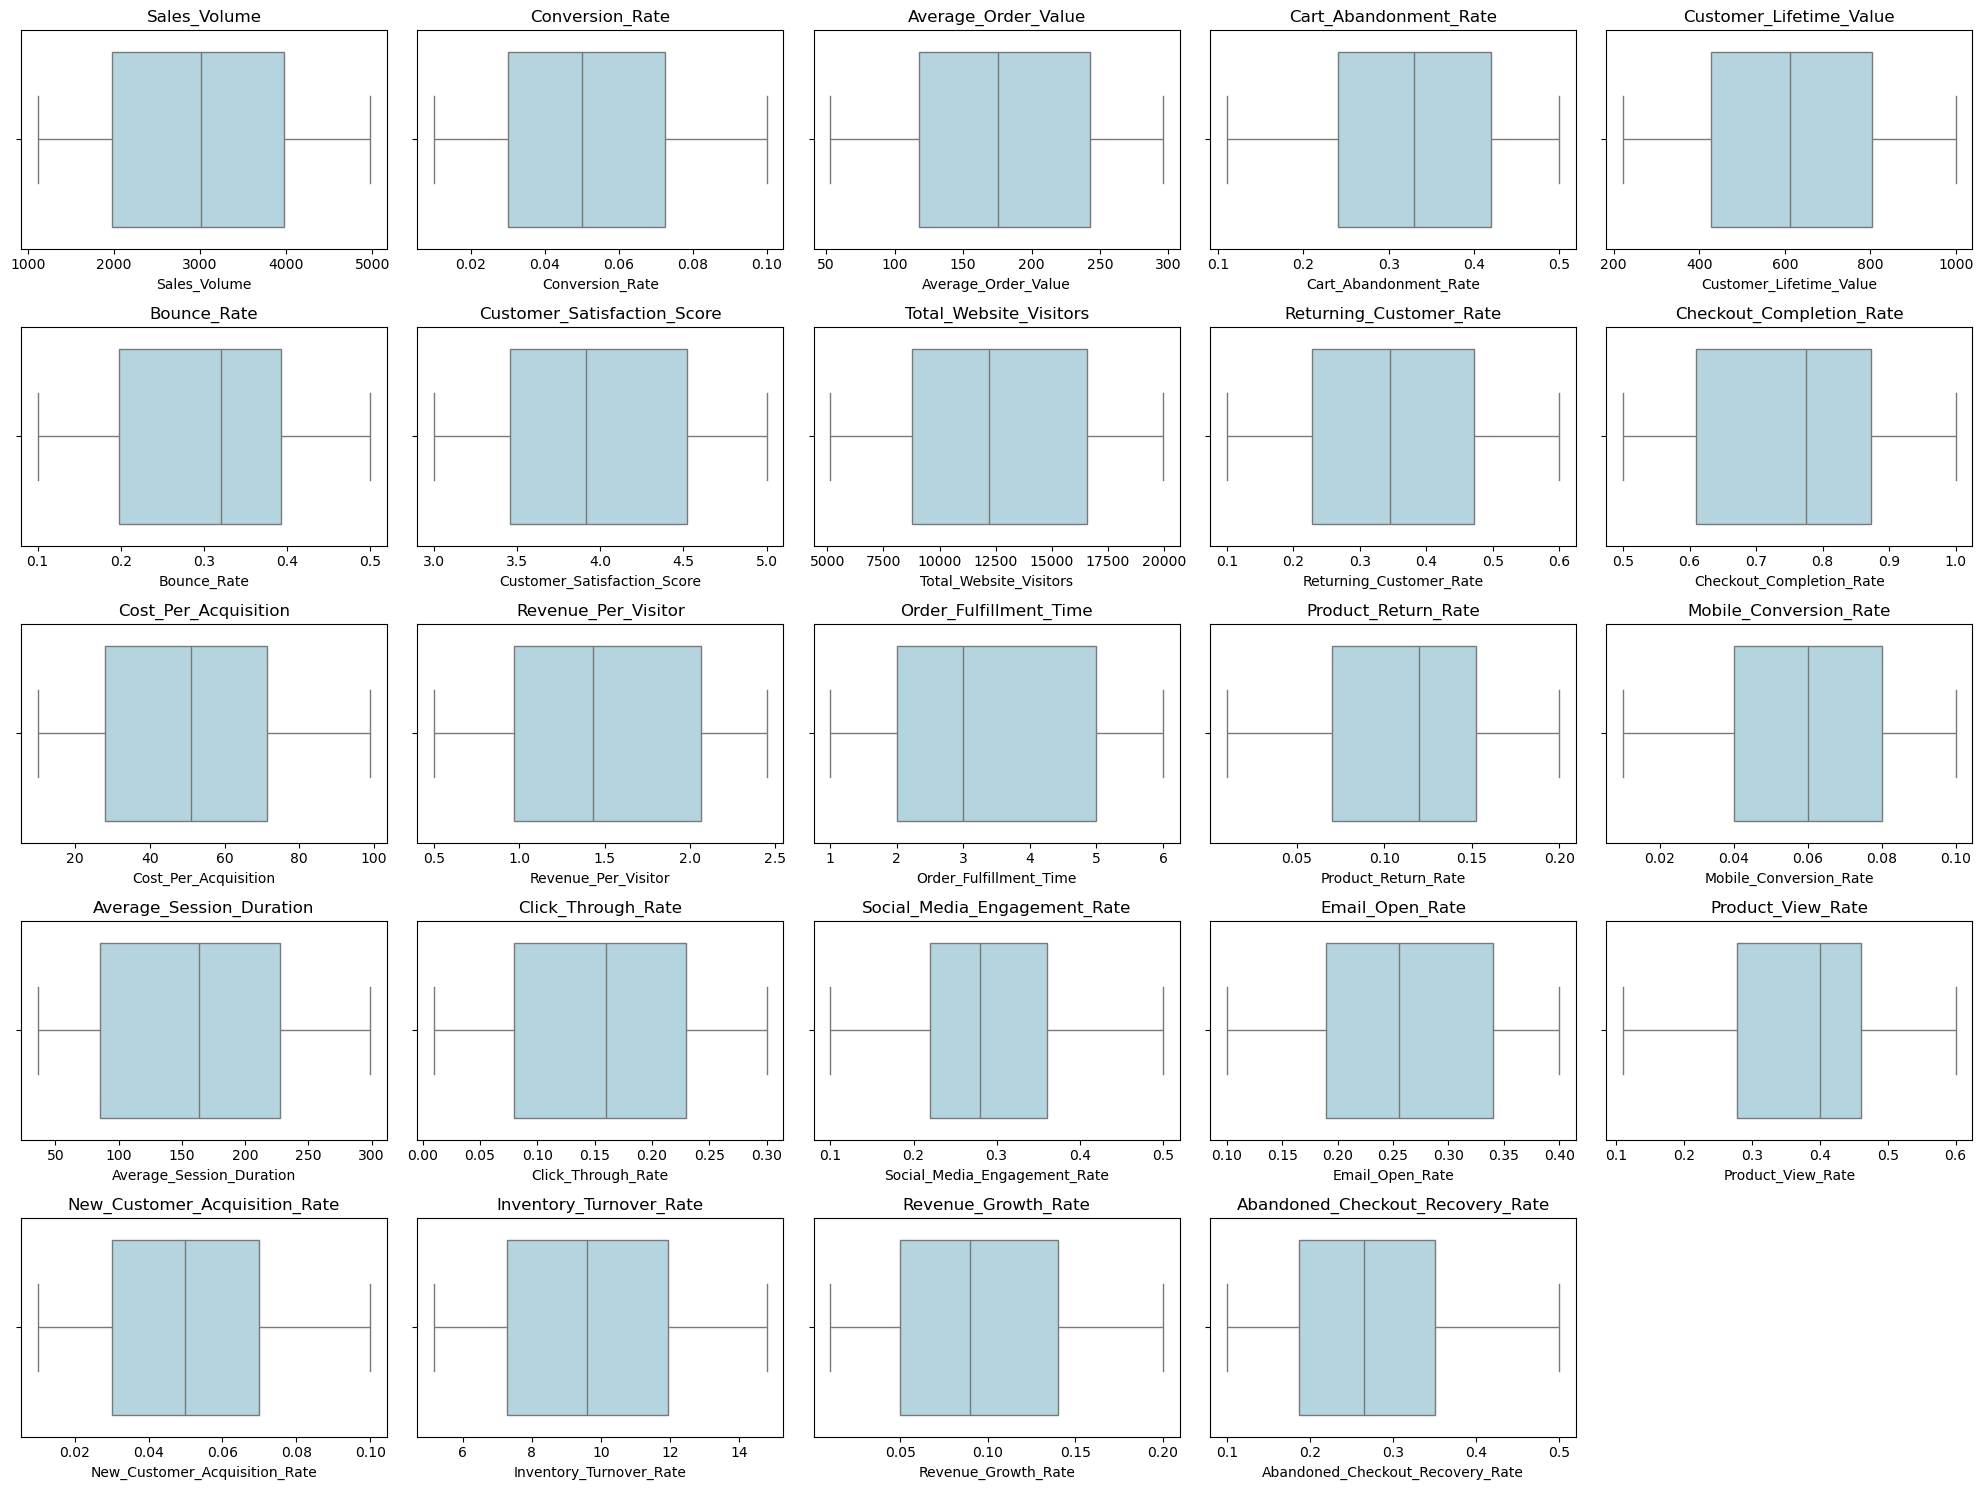

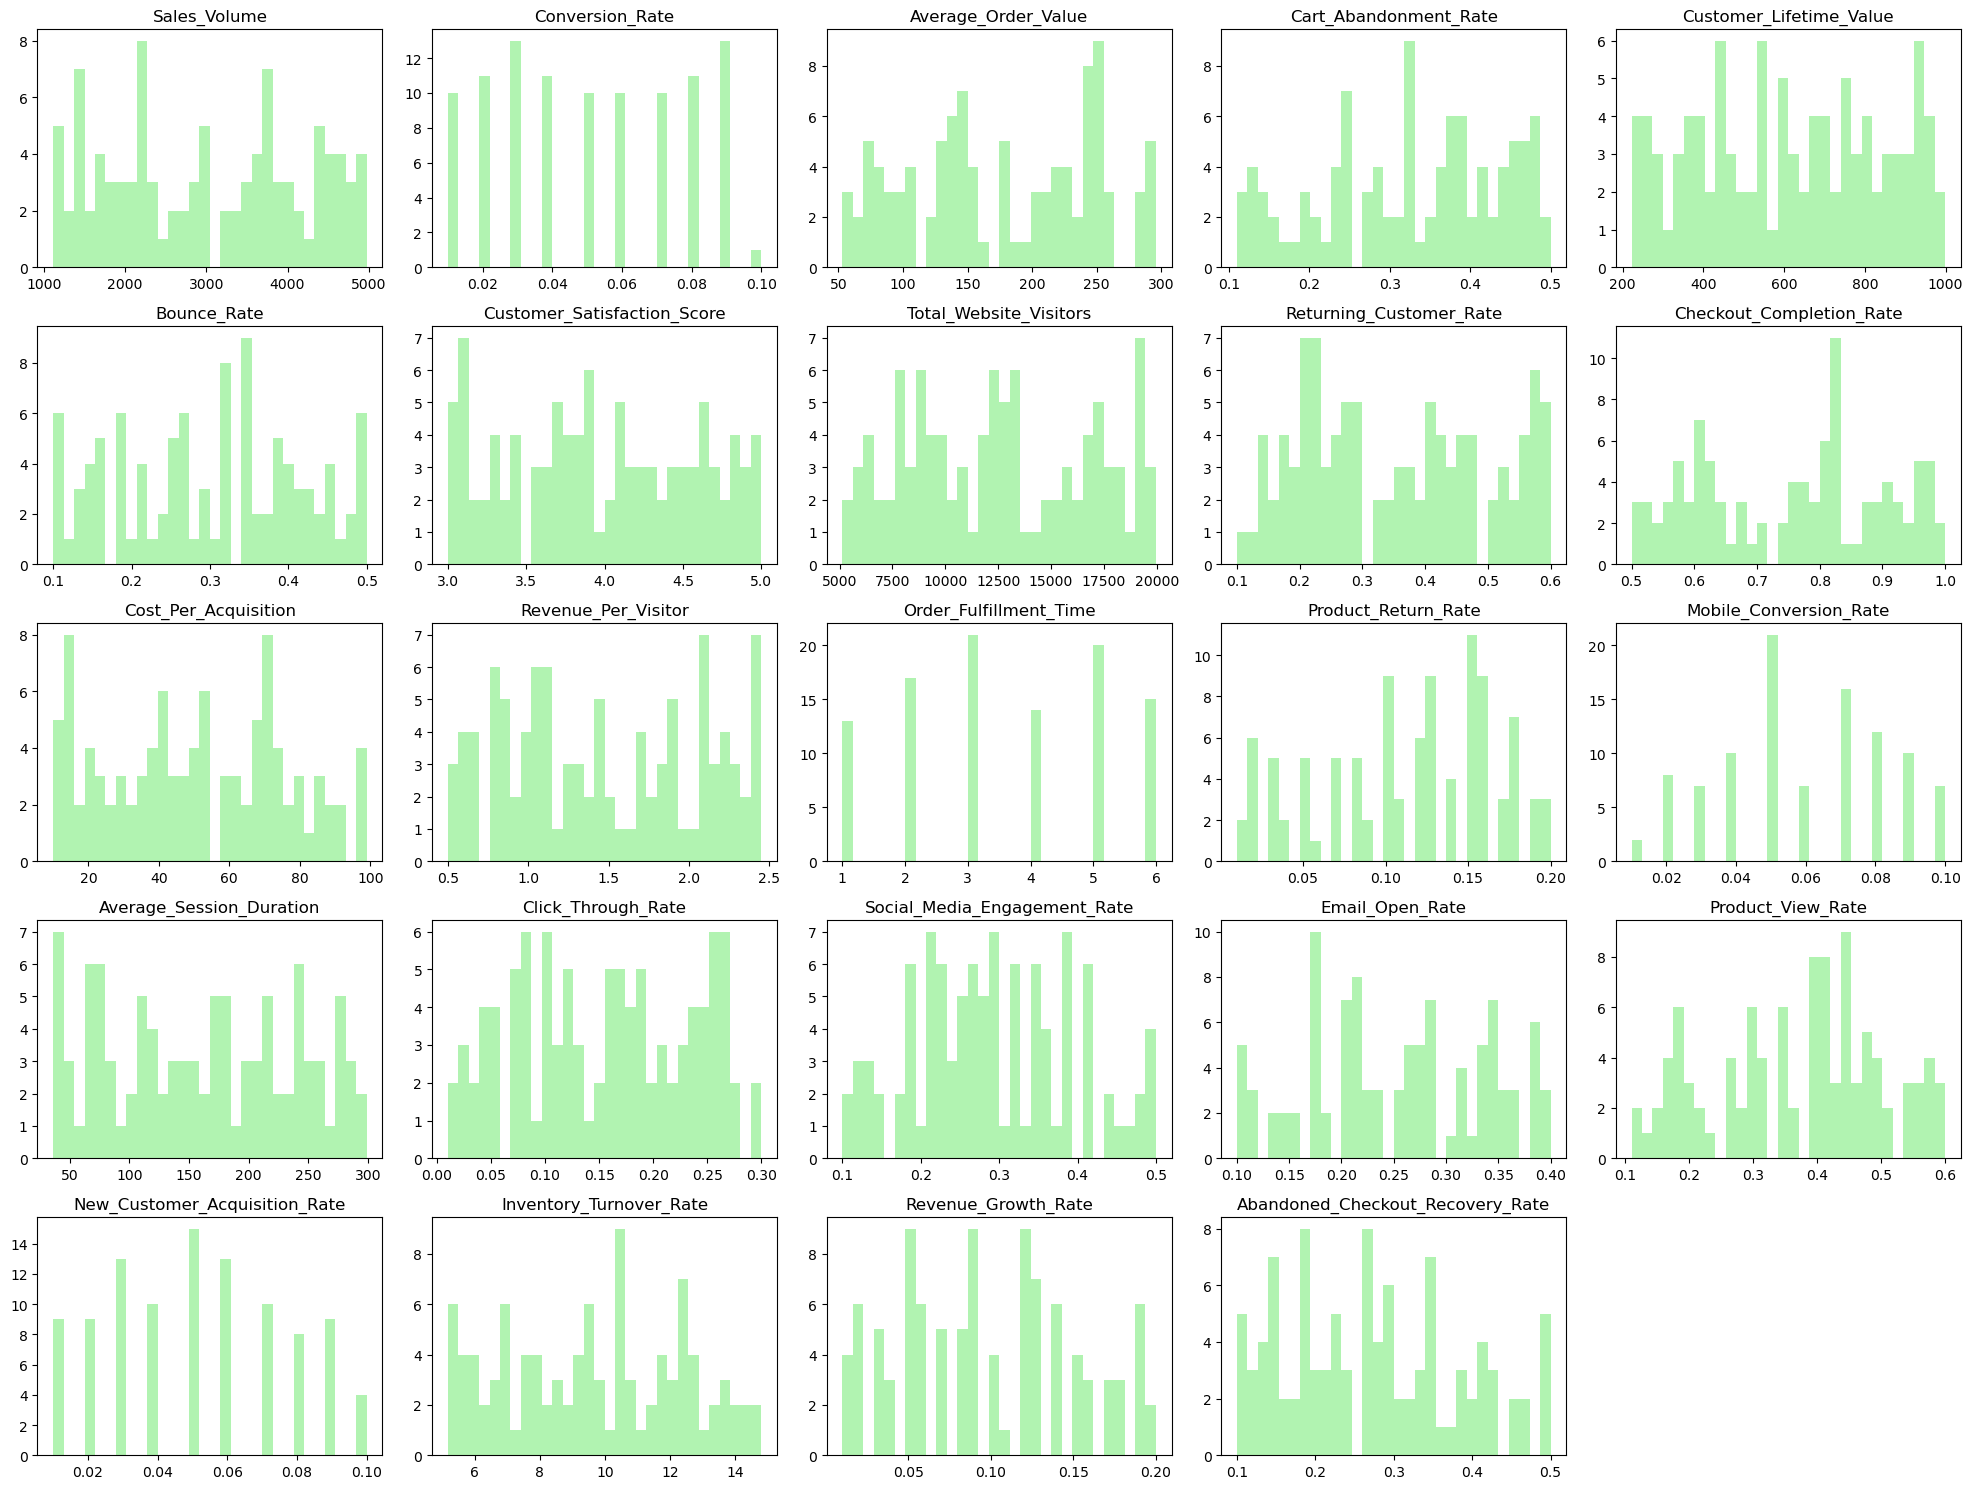

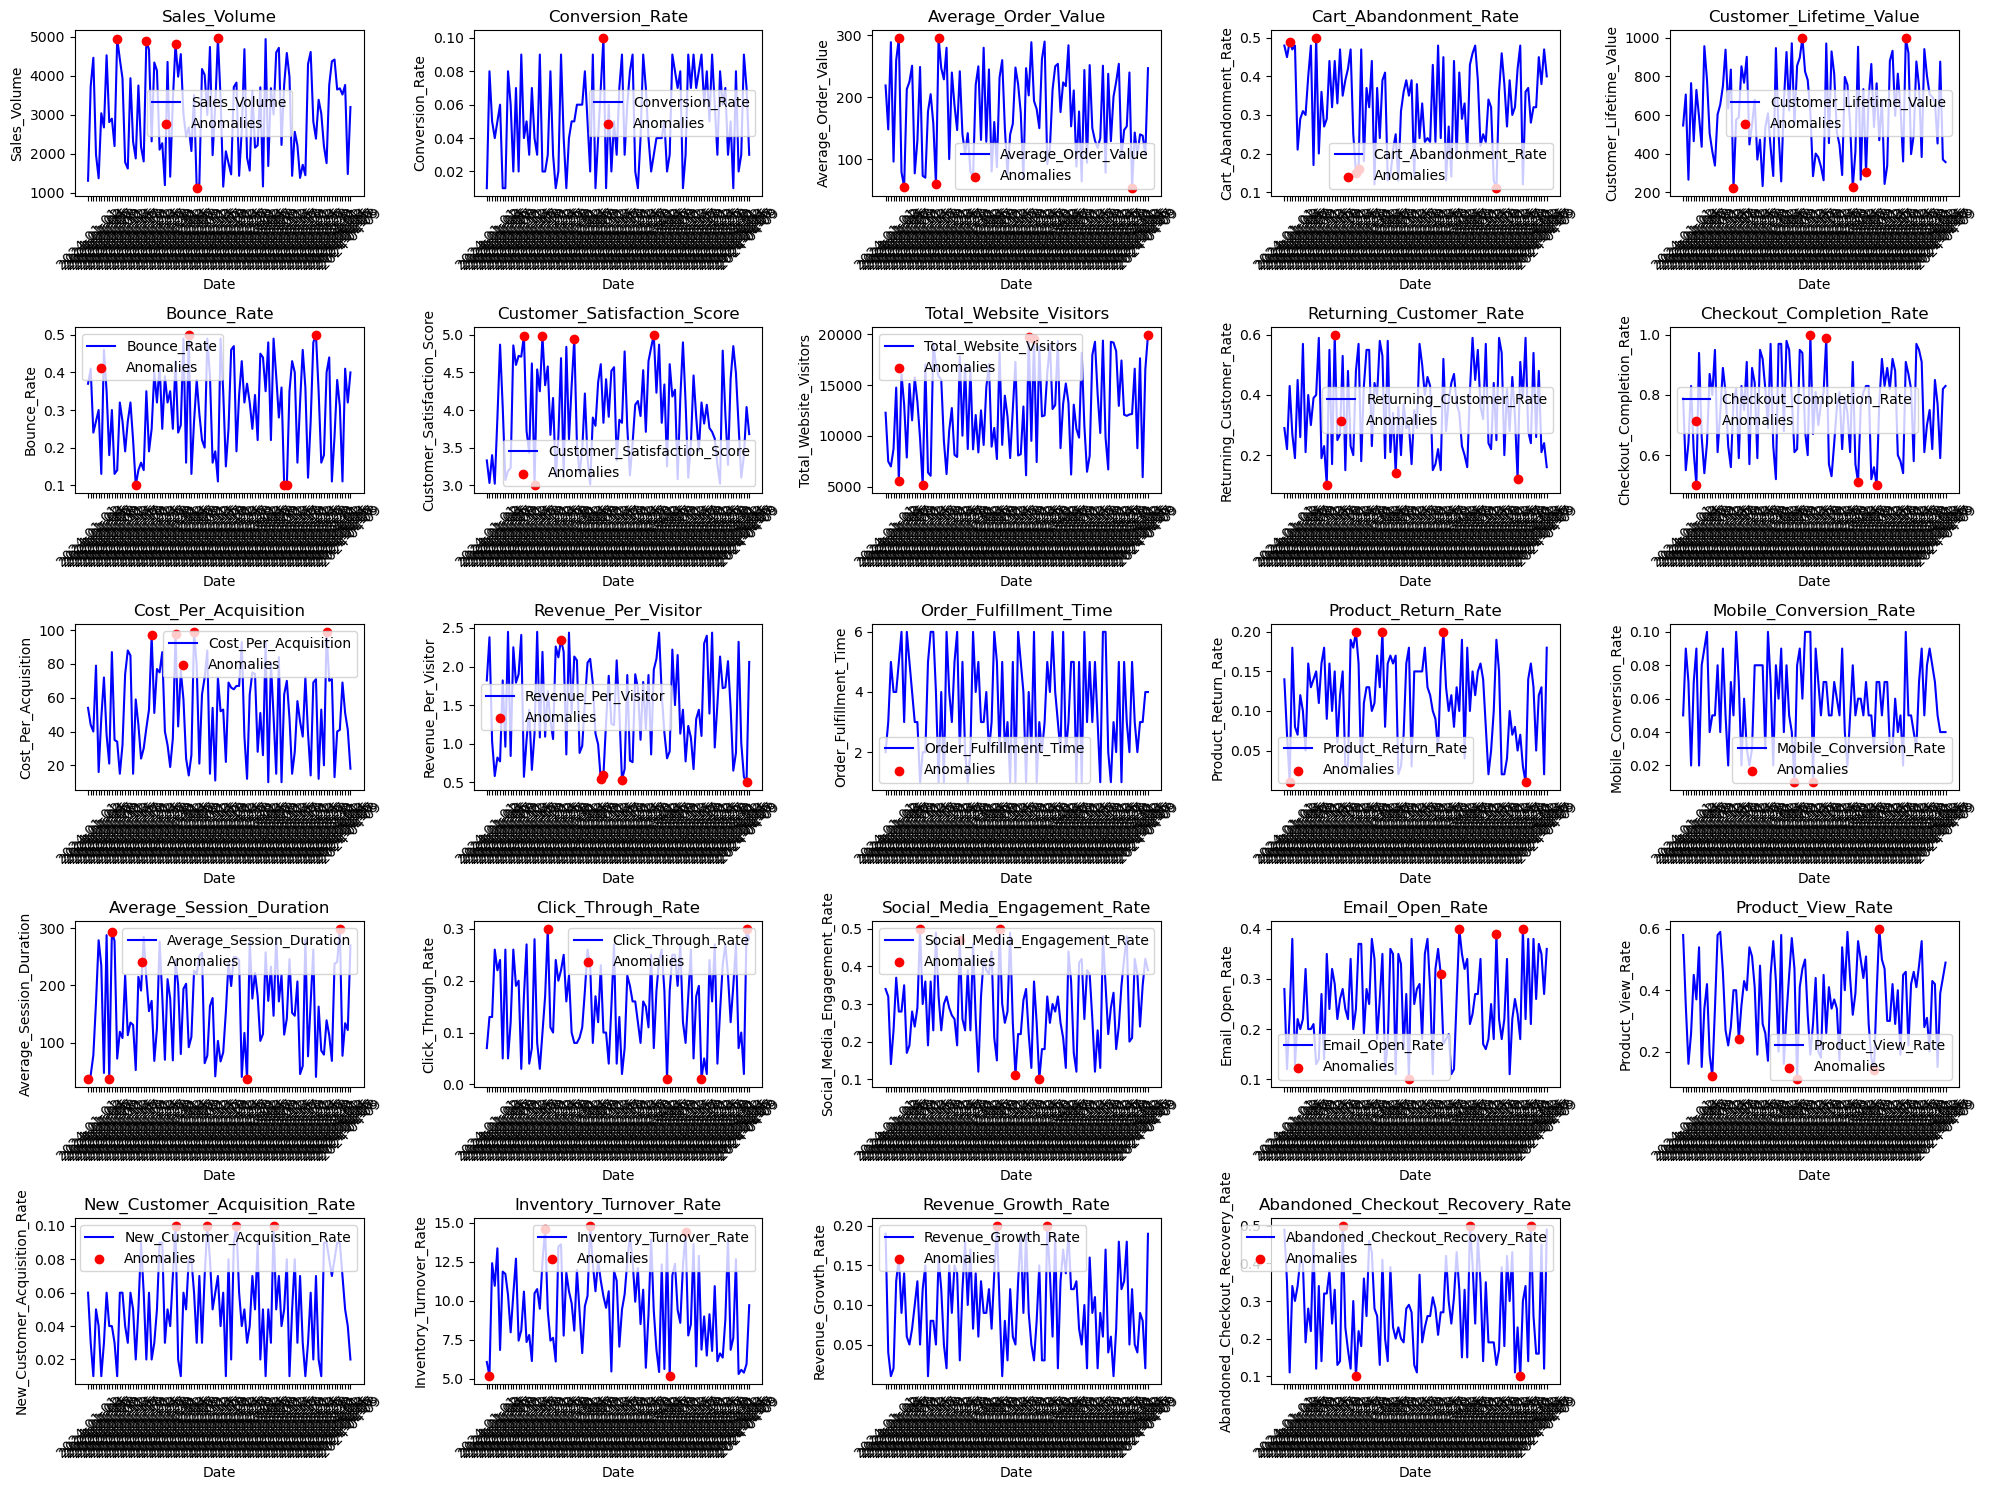

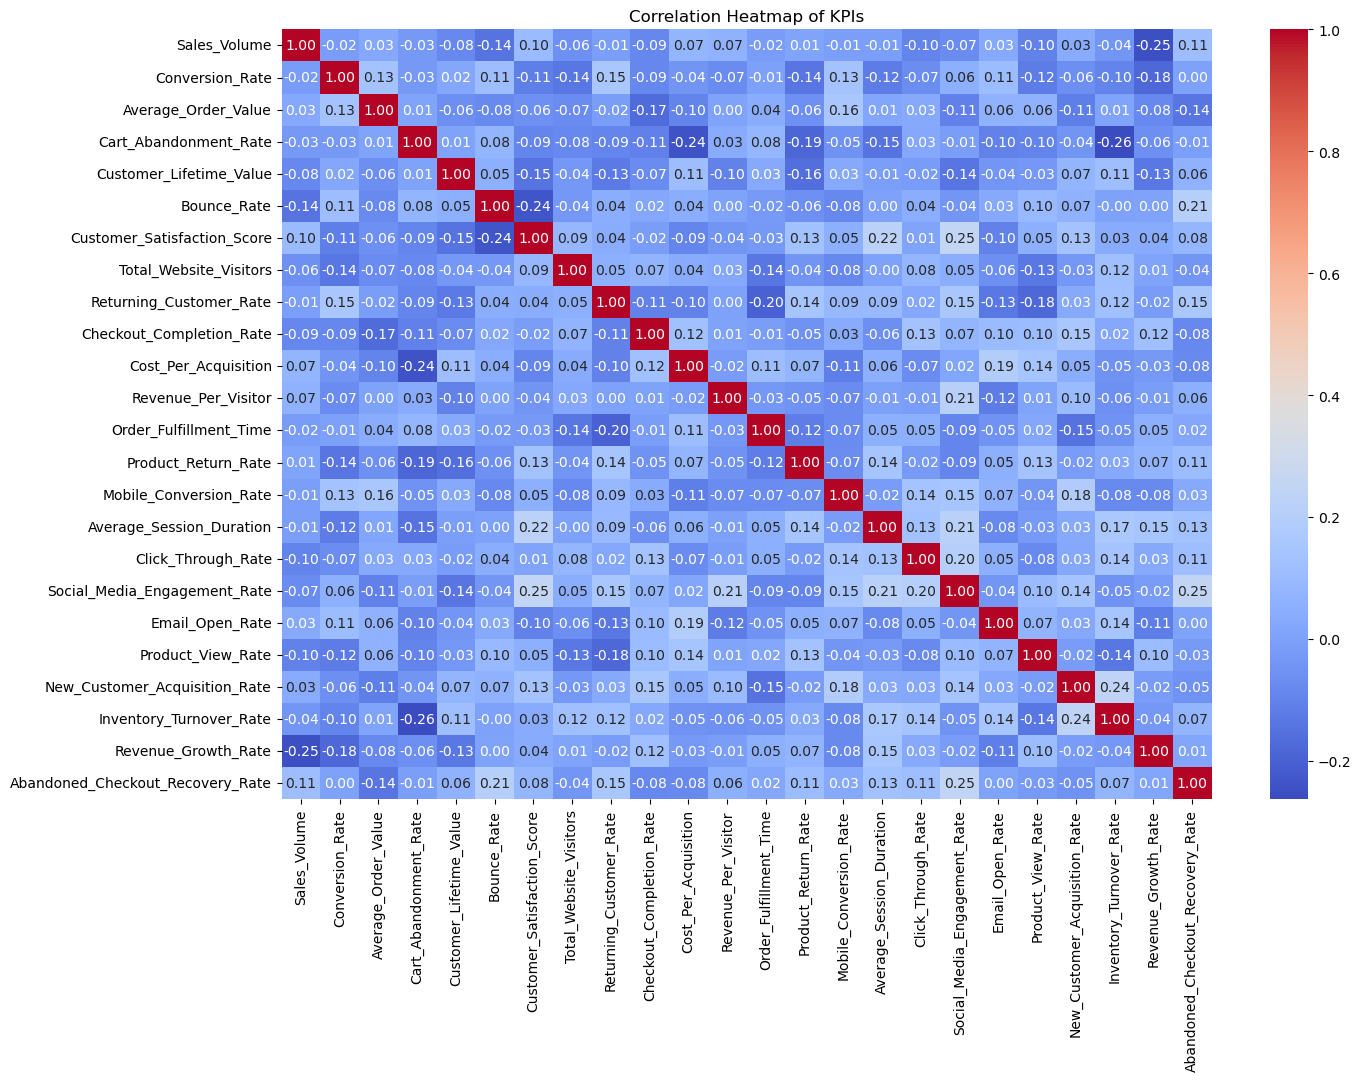

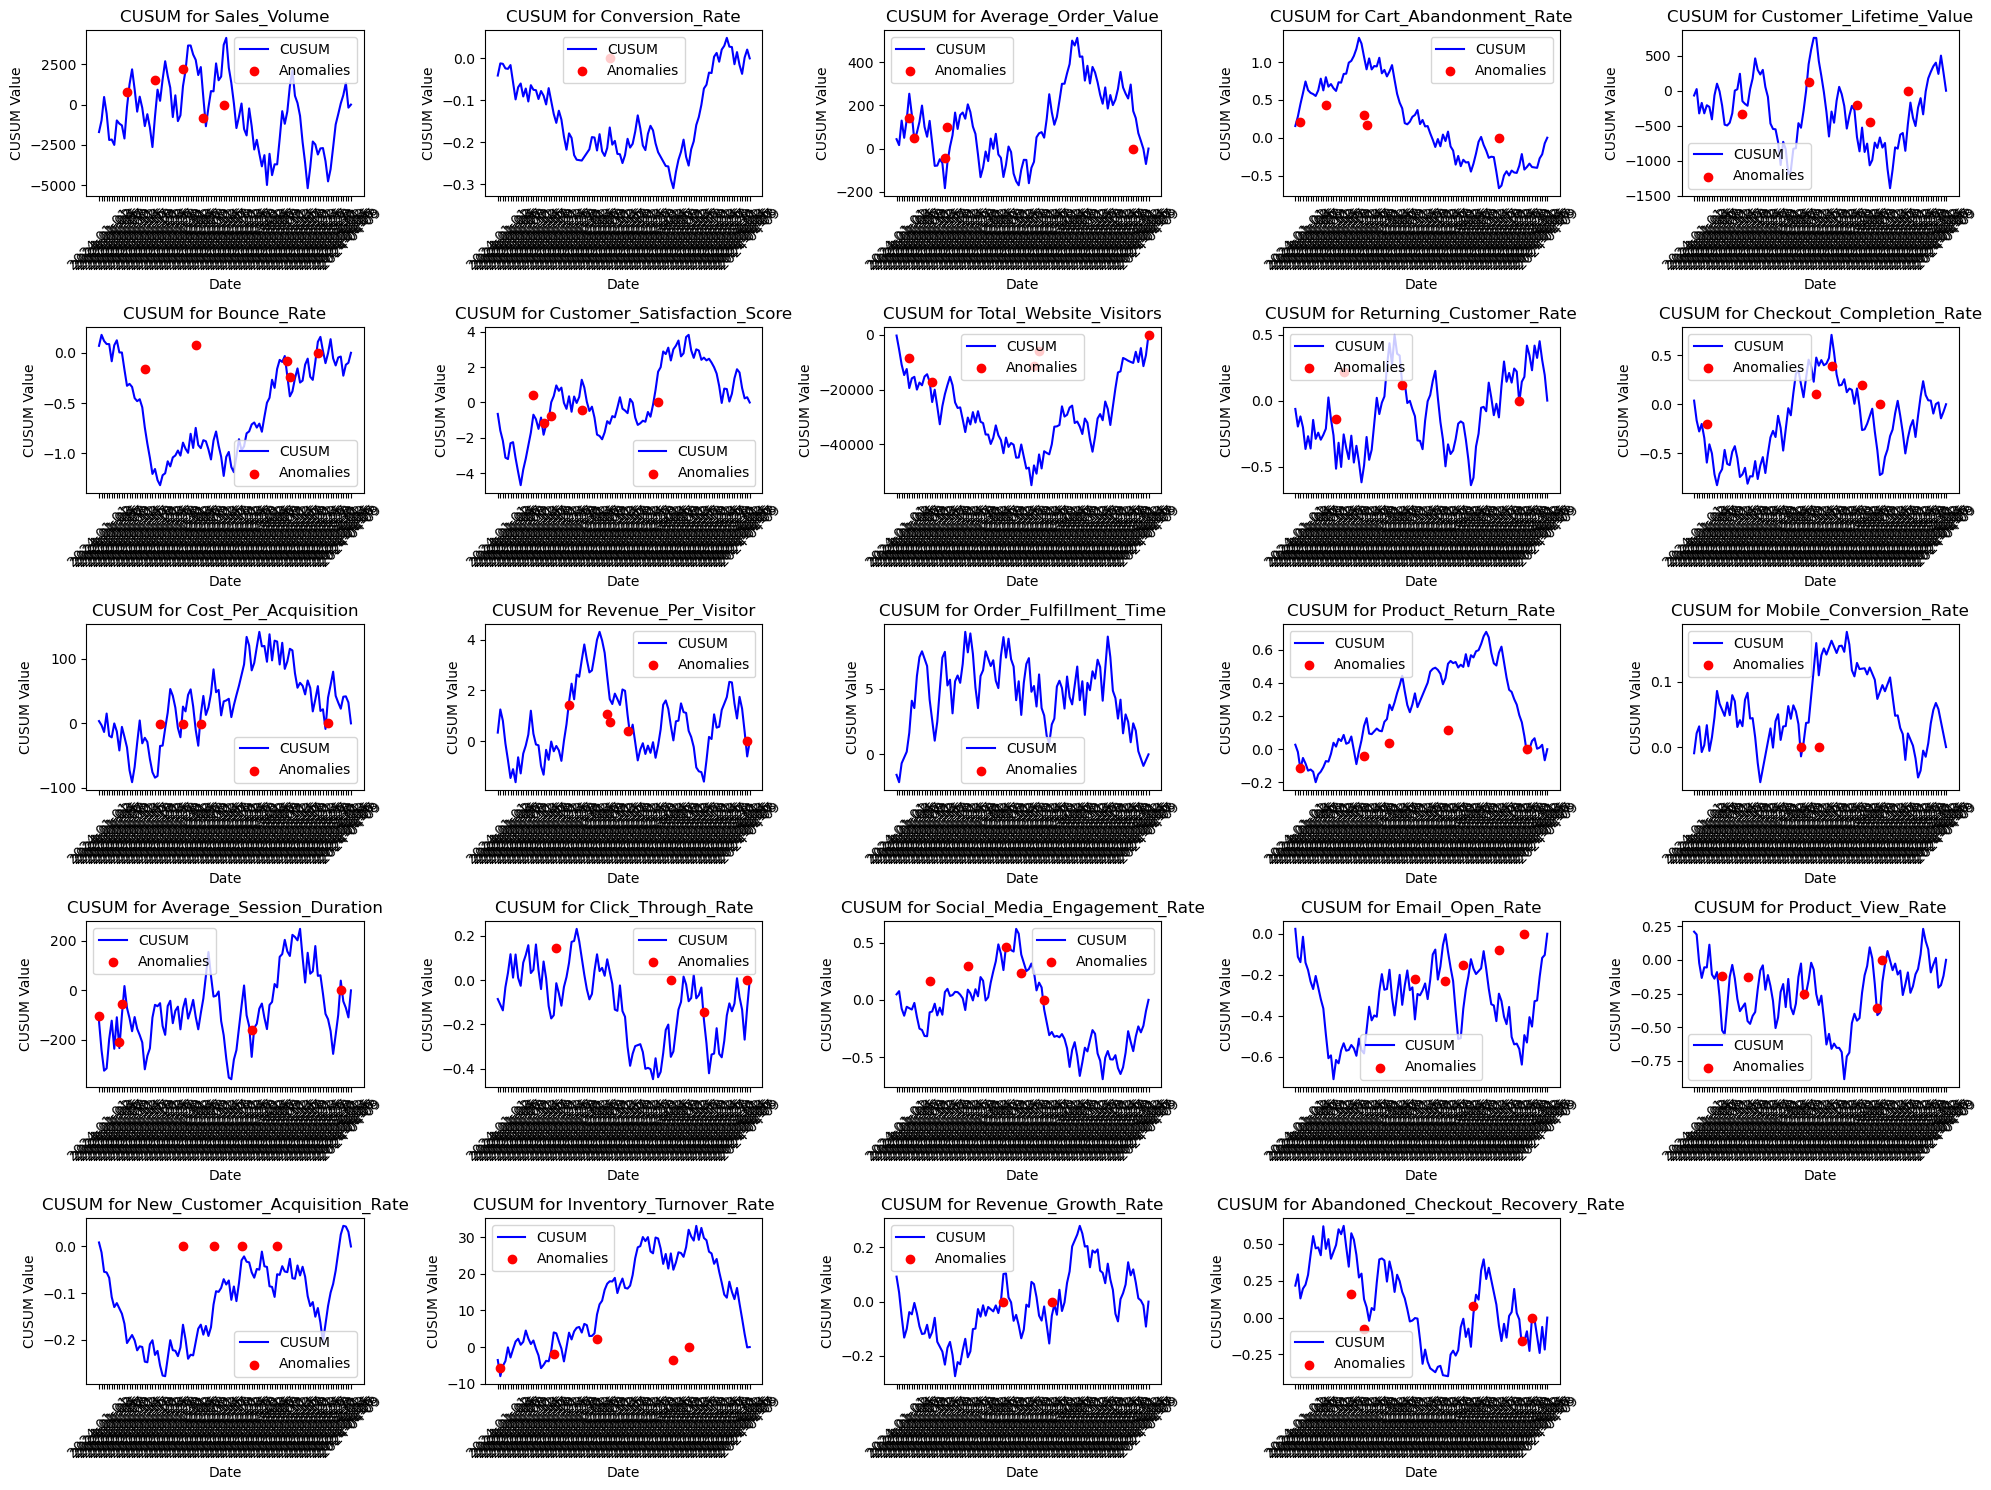

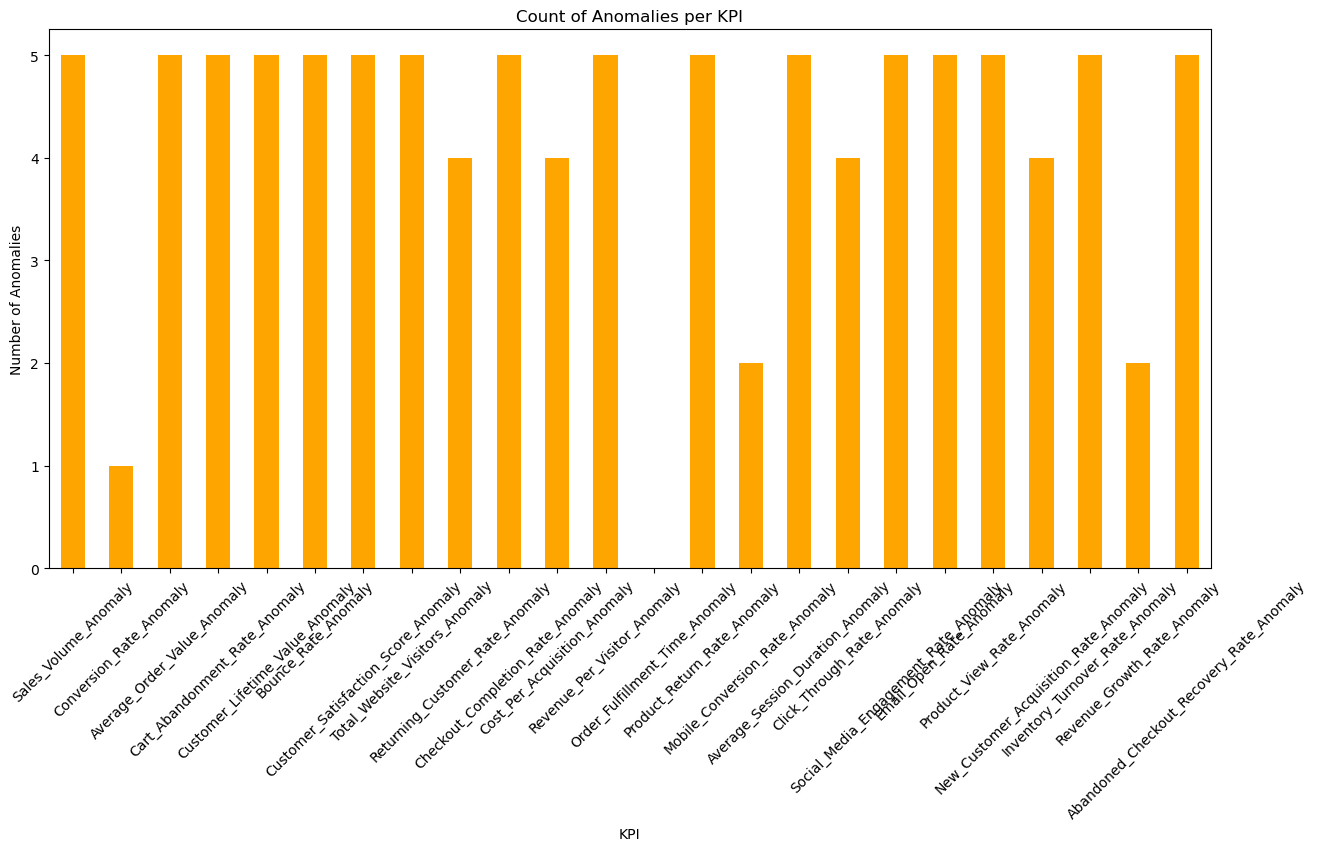

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Step 1: Load the e-commerce KPI data
df = pd.read_csv("ecommerce_kpi_data.csv")

# Step 2: Display the first few rows and check for null values
print(df.head())
print(df.isnull().sum())

# Step 3: Define numerical KPIs for anomaly detection
numerical_kpis = [
    "Sales_Volume", "Conversion_Rate", "Average_Order_Value",
    "Cart_Abandonment_Rate", "Customer_Lifetime_Value",
    "Bounce_Rate", "Customer_Satisfaction_Score",
    "Total_Website_Visitors", "Returning_Customer_Rate",
    "Checkout_Completion_Rate", "Cost_Per_Acquisition",
    "Revenue_Per_Visitor", "Order_Fulfillment_Time",
    "Product_Return_Rate", "Mobile_Conversion_Rate",
    "Average_Session_Duration", "Click_Through_Rate",
    "Social_Media_Engagement_Rate", "Email_Open_Rate",
    "Product_View_Rate", "New_Customer_Acquisition_Rate",
    "Inventory_Turnover_Rate", "Revenue_Growth_Rate",
    "Abandoned_Checkout_Recovery_Rate",
]

# Step 4: Detect anomalies using Isolation Forest
for kpi in numerical_kpis:
    # Train Isolation Forest
    model = IsolationForest(contamination=0.05, random_state=42)
    df[f'{kpi}_Anomaly'] = model.fit_predict(df[[kpi]])
    df[f'{kpi}_Anomaly'] = df[f'{kpi}_Anomaly'].map({1: 0, -1: 1})  # Map to 0 (normal) and 1 (anomaly)

# Step 5: Visualizations
# Scatter plots for each KPI
plt.figure(figsize=(20, 15))
for i, kpi in enumerate(numerical_kpis):
    plt.subplot(5, 5, i + 1)
    plt.scatter(df['Date'], df[kpi], label=kpi, color='blue', alpha=0.5)
    plt.scatter(df[df[f'{kpi}_Anomaly'] == 1]['Date'], 
                df[df[f'{kpi}_Anomaly'] == 1][kpi], 
                color='red', label='Anomalies', zorder=5)
    plt.title(kpi)
    plt.xlabel('Date')
    plt.ylabel(kpi)
    plt.xticks(rotation=45)
    plt.legend()
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(20, 15))
for i, kpi in enumerate(numerical_kpis):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[kpi], color='lightblue')
    plt.title(kpi)
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(20, 15))
for i, kpi in enumerate(numerical_kpis):
    plt.subplot(5, 5, i + 1)
    plt.hist(df[kpi], bins=30, color='lightgreen', alpha=0.7)
    plt.title(kpi)
plt.tight_layout()
plt.show()

# Time Series Line Plots
plt.figure(figsize=(20, 15))
for i, kpi in enumerate(numerical_kpis):
    plt.subplot(5, 5, i + 1)
    plt.plot(df['Date'], df[kpi], color='blue', label=kpi)
    plt.scatter(df[df[f'{kpi}_Anomaly'] == 1]['Date'], 
                df[df[f'{kpi}_Anomaly'] == 1][kpi], 
                color='red', label='Anomalies', zorder=5)
    plt.title(kpi)
    plt.xlabel('Date')
    plt.ylabel(kpi)
    plt.xticks(rotation=45)
    plt.legend()
plt.tight_layout()
plt.show()

# Correlation Heatmap
correlation_matrix = df[numerical_kpis].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of KPIs")
plt.show()

# CUSUM Charts
def calculate_cusum(data):
    mean = np.mean(data)
    return np.cumsum(data - mean)

plt.figure(figsize=(20, 15))
for i, kpi in enumerate(numerical_kpis):
    plt.subplot(5, 5, i + 1)
    plt.plot(df['Date'], calculate_cusum(df[kpi]), color='blue', label='CUSUM')
    plt.scatter(df[df[f'{kpi}_Anomaly'] == 1]['Date'], 
                calculate_cusum(df[df[f'{kpi}_Anomaly'] == 1][kpi]), 
                color='red', label='Anomalies', zorder=5)
    plt.title(f'CUSUM for {kpi}')
    plt.xlabel('Date')
    plt.ylabel('CUSUM Value')
    plt.xticks(rotation=45)
    plt.legend()
plt.tight_layout()
plt.show()

# Anomaly Summary Bar Chart
anomaly_counts = df[[f'{kpi}_Anomaly' for kpi in numerical_kpis]].sum()
plt.figure(figsize=(15, 7))
anomaly_counts.plot(kind='bar', color='orange')
plt.title("Count of Anomalies per KPI")
plt.xlabel("KPI")
plt.ylabel("Number of Anomalies")
plt.xticks(rotation=45)
plt.show()


In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Define the number of rows
num_rows = 100

# Generate random dates
start_date = datetime(2024, 1, 1)
date_range = [start_date + timedelta(days=i) for i in range(num_rows)]

# Generate customer names
customer_names = np.random.choice(['John Doe', 'Jane Smith', 'Alice Brown', 'Bob Johnson', 'Charlie Clark', 'Diana Prince'], size=num_rows)

# Generate random data for the KPIs
data = {
    "Date": date_range,
    "Site_ID": np.random.choice([1, 2, 3, 4, 5], size=num_rows),
    "Sales_Volume": np.random.randint(1000, 5000, size=num_rows),
    "Conversion_Rate": np.random.uniform(0.01, 0.10, size=num_rows).round(2),
    "Average_Order_Value": np.random.randint(50, 300, size=num_rows),
    "Cart_Abandonment_Rate": np.random.uniform(0.1, 0.5, size=num_rows).round(2),
    "Customer_Lifetime_Value": np.random.randint(200, 1000, size=num_rows),
    "Traffic_Source": np.random.choice(['Organic', 'Paid', 'Referral', 'Social Media'], size=num_rows),
    "Bounce_Rate": np.random.uniform(0.1, 0.5, size=num_rows).round(2),
    "Customer_Satisfaction_Score": np.random.uniform(3, 5, size=num_rows).round(2),
    "Total_Website_Visitors": np.random.randint(5000, 20000, size=num_rows),
    "Returning_Customer_Rate": np.random.uniform(0.1, 0.6, size=num_rows).round(2),
    "Checkout_Completion_Rate": np.random.uniform(0.5, 1.0, size=num_rows).round(2),
    "Cost_Per_Acquisition": np.random.randint(10, 100, size=num_rows),
    "Revenue_Per_Visitor": np.random.uniform(0.5, 2.5, size=num_rows).round(2),
    "Order_Fulfillment_Time": np.random.randint(1, 7, size=num_rows),  # in days
    "Product_Return_Rate": np.random.uniform(0.01, 0.2, size=num_rows).round(2),
    "Mobile_Conversion_Rate": np.random.uniform(0.01, 0.1, size=num_rows).round(2),
    "Average_Session_Duration": np.random.randint(30, 300, size=num_rows),  # in seconds
    "Click_Through_Rate": np.random.uniform(0.01, 0.3, size=num_rows).round(2),
    "Social_Media_Engagement_Rate": np.random.uniform(0.1, 0.5, size=num_rows).round(2),
    "Email_Open_Rate": np.random.uniform(0.1, 0.4, size=num_rows).round(2),
    "Product_View_Rate": np.random.uniform(0.1, 0.6, size=num_rows).round(2),
    "New_Customer_Acquisition_Rate": np.random.uniform(0.01, 0.1, size=num_rows).round(2),
    "Inventory_Turnover_Rate": np.random.uniform(5, 15, size=num_rows).round(2),
    "Revenue_Growth_Rate": np.random.uniform(0.01, 0.2, size=num_rows).round(2),
    "Abandoned_Checkout_Recovery_Rate": np.random.uniform(0.1, 0.5, size=num_rows).round(2),
    # Adding Customer Details
    "Customer_ID": np.random.randint(1000, 2000, size=num_rows),
    "Customer_Name": np.random.choice(['John Doe', 'Jane Smith', 'Alice Brown', 'Bob Green', 'Chris White'], size=num_rows),
    "Customer_Email": np.random.choice(['johndoe@mail.com', 'janesmith@mail.com', 'alicebrown@mail.com', 'bobgreen@mail.com', 'chriswhite@mail.com'], size=num_rows)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the generated DataFrame
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv("ecommerce_kpi_data_with_customers.csv", index=False)


        Date  Site_ID  Sales_Volume  Conversion_Rate  Average_Order_Value  \
0 2024-01-01        3          4690             0.09                  105   
1 2024-01-02        5          3893             0.08                  120   
2 2024-01-03        5          2706             0.05                  282   
3 2024-01-04        5          1712             0.08                  293   
4 2024-01-05        4          4417             0.07                   73   

   Cart_Abandonment_Rate  Customer_Lifetime_Value Traffic_Source  Bounce_Rate  \
0                   0.39                      736           Paid         0.46   
1                   0.39                      330       Referral         0.11   
2                   0.24                      896       Referral         0.38   
3                   0.29                      225           Paid         0.47   
4                   0.24                      313           Paid         0.32   

   Customer_Satisfaction_Score  ...  Social_Media_

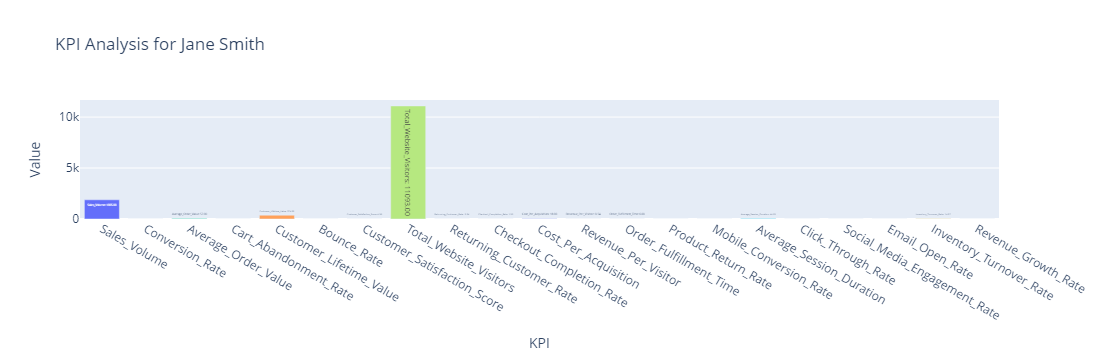

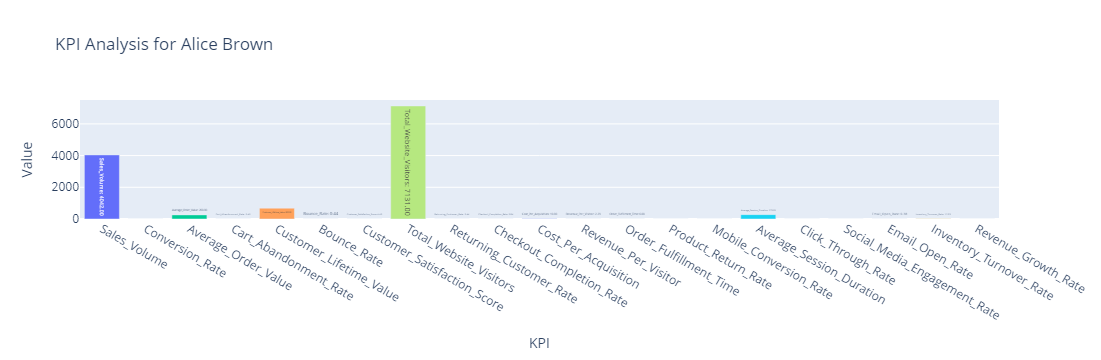

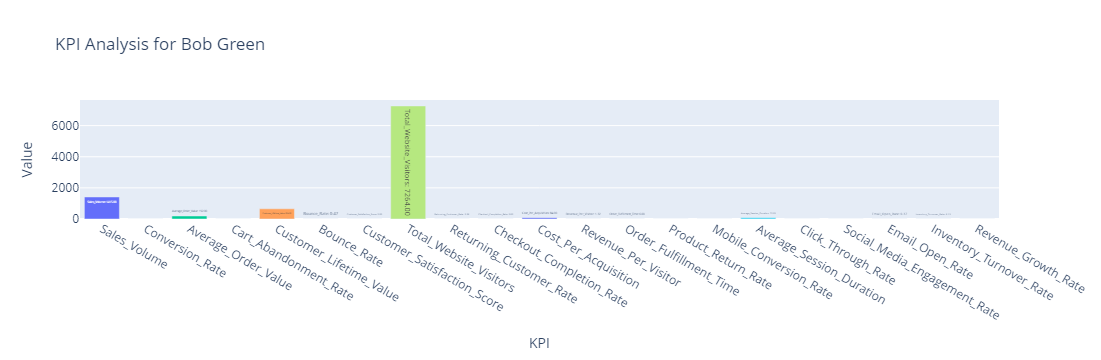

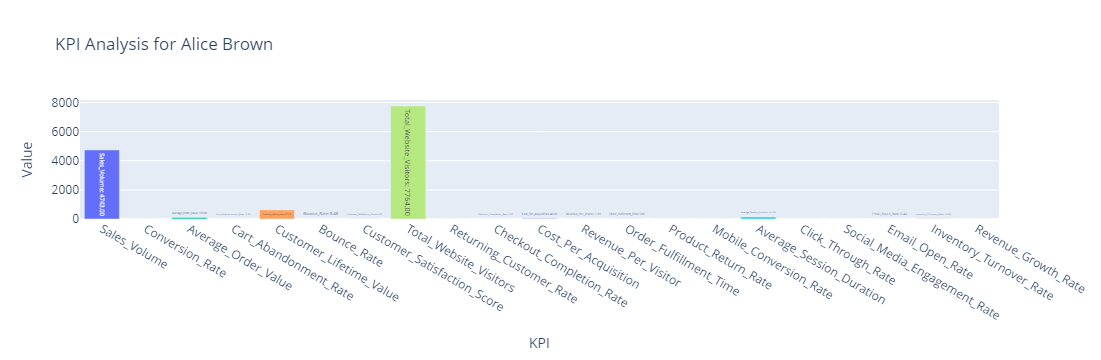

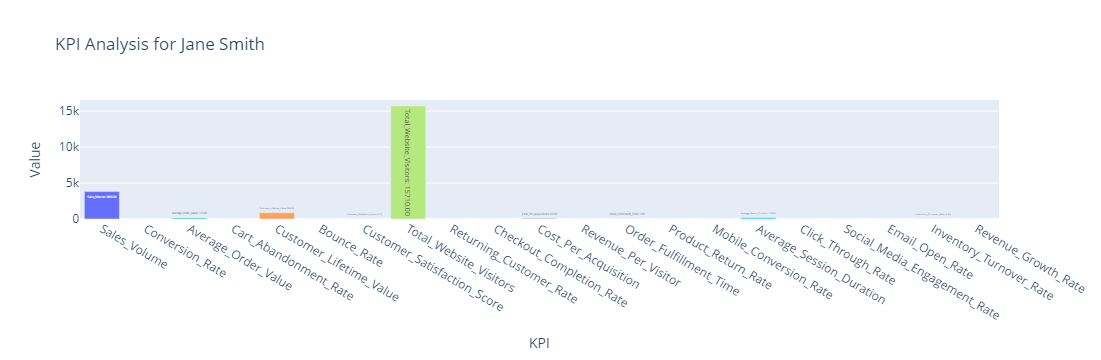

KeyError: "['Reason_for_Anomaly'] not in index"

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.graph_objects as go

# Step 1: Load the dataset
df = pd.read_csv("ecommerce_kpi_data_with_customers.csv")

# Step 2: Encode categorical features (like Traffic Source, Customer Name)
le = LabelEncoder()
df['Traffic_Source'] = le.fit_transform(df['Traffic_Source'])

# Step 3: Select important 20 KPIs for anomaly detection
kpis = [
    "Sales_Volume", "Conversion_Rate", "Average_Order_Value", "Cart_Abandonment_Rate",
    "Customer_Lifetime_Value", "Bounce_Rate", "Customer_Satisfaction_Score", "Total_Website_Visitors",
    "Returning_Customer_Rate", "Checkout_Completion_Rate", "Cost_Per_Acquisition", "Revenue_Per_Visitor",
    "Order_Fulfillment_Time", "Product_Return_Rate", "Mobile_Conversion_Rate", "Average_Session_Duration",
    "Click_Through_Rate", "Social_Media_Engagement_Rate", "Email_Open_Rate", "Inventory_Turnover_Rate",
    "Revenue_Growth_Rate"
]

# Step 4: Normalize the data (Standard Scaler)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[kpis])

# Step 5: Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df_scaled)

# Anomaly values: -1 means anomaly, 1 means normal
anomalies = df[df['Anomaly'] == -1]

# Step 6: Identify faulty customers based on anomalies
faulty_customers = anomalies[['Customer_ID', 'Customer_Name', 'Customer_Email', 'Sales_Volume', 'Conversion_Rate', 'Anomaly']]

# Step 7: Compute Z-scores for each KPI to measure deviation from the norm
df_z_scores = pd.DataFrame(df_scaled, columns=kpis)
df_z_scores.index = df.index

# Threshold: If Z-score is above 3 or below -3, consider it as a significant anomaly for that KPI
threshold = 3

# Create a DataFrame to store reasons (KPI names) for each customer
df['Reason_for_Anomaly'] = df_z_scores.apply(lambda row: [kpi for kpi, z in zip(kpis, row) if abs(z) > threshold], axis=1)

# Step 8: Visualize anomalies for faulty customers using Plotly
for index, customer in faulty_customers.iterrows():
    fig = go.Figure()
    
    # Adding bars for each KPI
    for kpi in kpis:
        value = df.loc[df['Customer_ID'] == customer['Customer_ID'], kpi].values[0]
        fig.add_trace(go.Bar(
            x=[kpi],
            y=[value],
            hoverinfo='text',
            text=f'{kpi}: {value:.2f}',
            name=customer['Customer_Name']
        ))
    
    # Customize layout
    fig.update_layout(
        title=f"KPI Analysis for {customer['Customer_Name']}",
        xaxis_title="KPI",
        yaxis_title="Value",
        showlegend=False
    )
    
    fig.show()

# Step 9: Merge anomaly reasons with faulty customer details
faulty_customers_with_reasons = anomalies[['Customer_ID', 'Customer_Name', 'Customer_Email', 'Sales_Volume', 'Conversion_Rate', 'Reason_for_Anomaly']]

# Step 10: Save the faulty customers and their respective reasons to a CSV file
faulty_customers_with_reasons.to_csv("faulty_customers_with_kpi_reasons.csv", index=False)

# Print the first few faulty customers with reasons
print(faulty_customers_with_reasons.head())


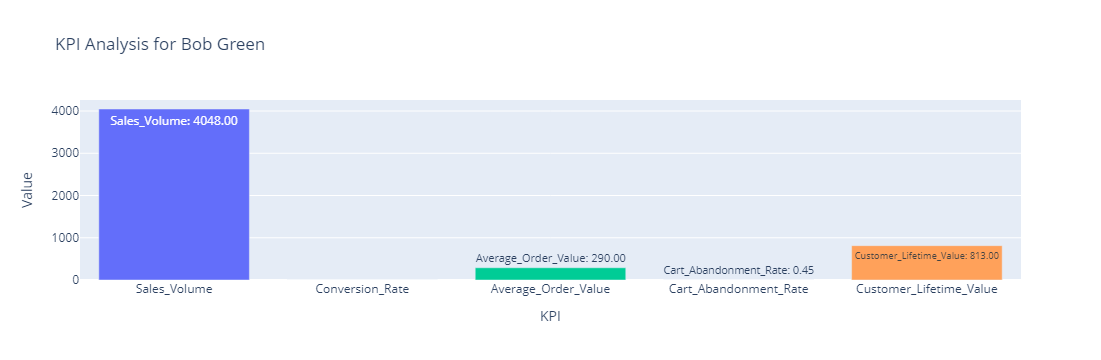

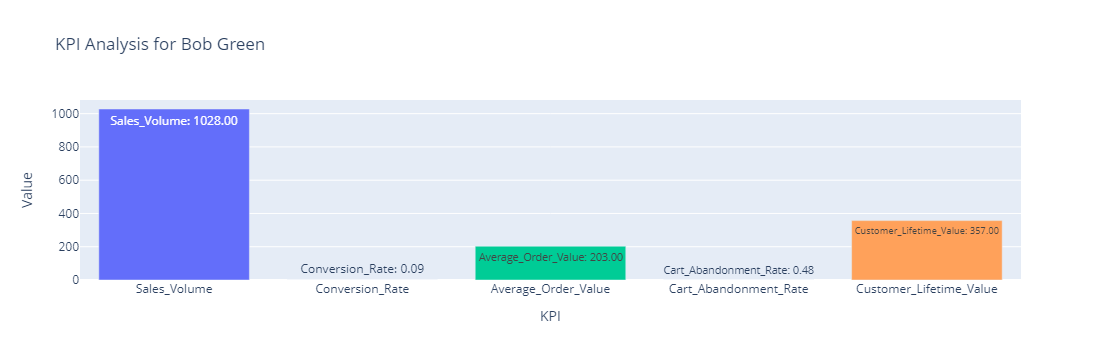

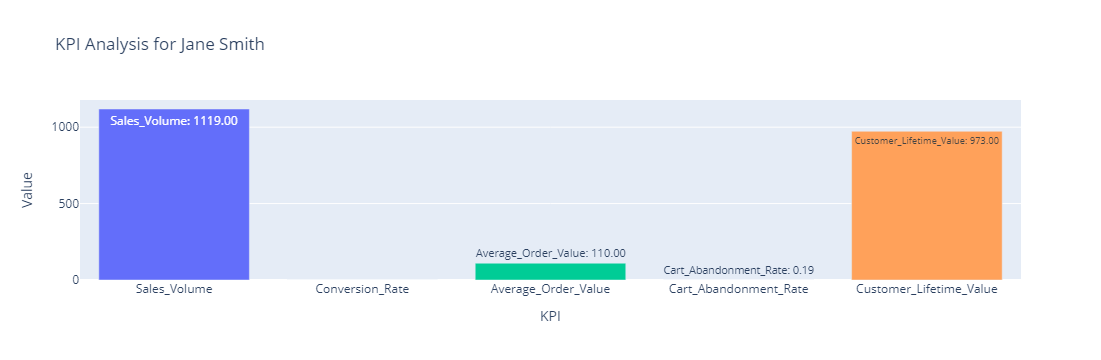

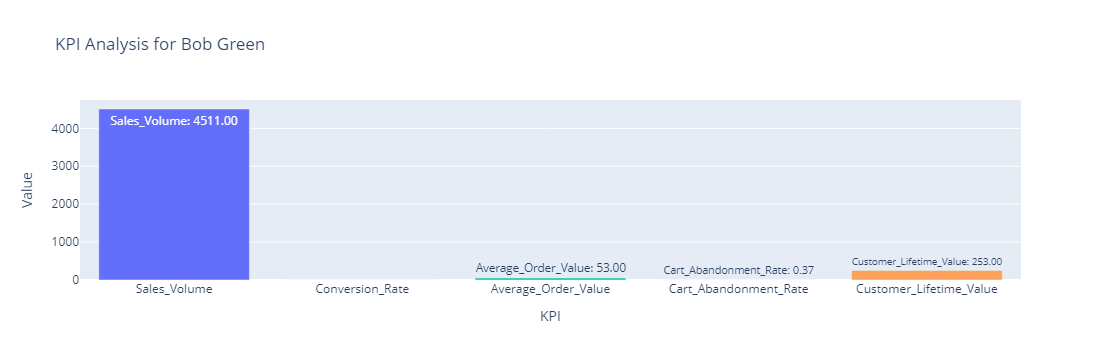

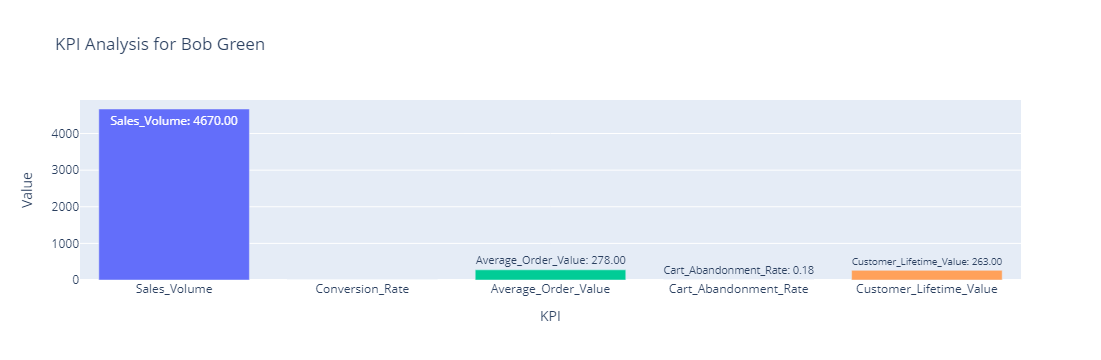

    Customer_ID Customer_Name       Customer_Email  Sales_Volume  \
3          1268     Bob Green    bobgreen@mail.com          4048   
4          1373     Bob Green    bobgreen@mail.com          1028   
34         1698    Jane Smith    bobgreen@mail.com          1119   
55         1577     Bob Green  alicebrown@mail.com          4511   
56         1120     Bob Green     johndoe@mail.com          4670   

    Conversion_Rate Reason_for_Anomaly  
3              0.01                 []  
4              0.09                 []  
34             0.02                 []  
55             0.07                 []  
56             0.09                 []  


In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.graph_objects as go

# Step 1: Load the dataset
df = pd.read_csv("ecommerce_kpi_data_with_customers.csv")

# Step 2: Encode categorical features (like Traffic Source, Customer Name)
le = LabelEncoder()
df['Traffic_Source'] = le.fit_transform(df['Traffic_Source'])

# Step 3: Select important KPIs for anomaly detection
kpis = [
    "Sales_Volume", "Conversion_Rate", "Average_Order_Value", "Cart_Abandonment_Rate",
    "Customer_Lifetime_Value"
]

# Step 4: Normalize the data (Standard Scaler)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[kpis])

# Step 5: Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df_scaled)

# Anomaly values: -1 means anomaly, 1 means normal
anomalies = df[df['Anomaly'] == -1]

# Step 6: Compute Z-scores for each KPI to measure deviation from the norm
df_z_scores = pd.DataFrame(df_scaled, columns=kpis)
df_z_scores.index = df.index

# Threshold: If Z-score is above 3 or below -3, consider it as a significant anomaly for that KPI
threshold = 3

# Create a DataFrame to store reasons (KPI names) for each customer
df['Reason_for_Anomaly'] = df_z_scores.apply(lambda row: [kpi for kpi, z in zip(kpis, row) if abs(z) > threshold], axis=1)

# Step 7: Identify faulty customers based on anomalies and include the reason for anomalies
faulty_customers = anomalies[['Customer_ID', 'Customer_Name', 'Customer_Email', 'Sales_Volume', 'Conversion_Rate']].copy()
faulty_customers['Reason_for_Anomaly'] = df.loc[df['Anomaly'] == -1, 'Reason_for_Anomaly'].values

# Step 8: Visualize anomalies for faulty customers using Plotly
for index, customer in faulty_customers.iterrows():
    fig = go.Figure()
    
    # Adding bars for each KPI
    for kpi in kpis:
        value = df.loc[df['Customer_ID'] == customer['Customer_ID'], kpi].values[0]
        fig.add_trace(go.Bar(
            x=[kpi],
            y=[value],
            hoverinfo='text',
            text=f'{kpi}: {value:.2f}',
            name=customer['Customer_Name']
        ))
    
    # Customize layout
    fig.update_layout(
        title=f"KPI Analysis for {customer['Customer_Name']}",
        xaxis_title="KPI",
        yaxis_title="Value",
        showlegend=False
    )
    
    fig.show()

# Step 9: Save the faulty customers and their respective reasons to a CSV file
faulty_customers.to_csv("faulty_customers_with_kpi_reasons.csv", index=False)

# Print the first few faulty customers with reasons
print(faulty_customers.head())


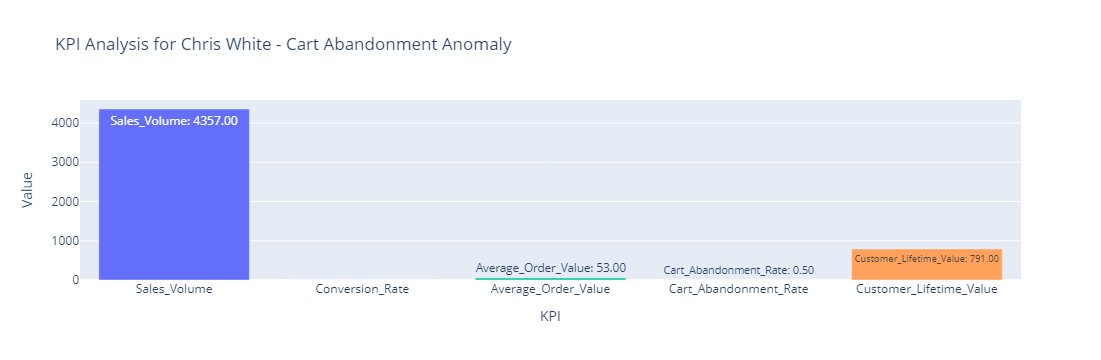

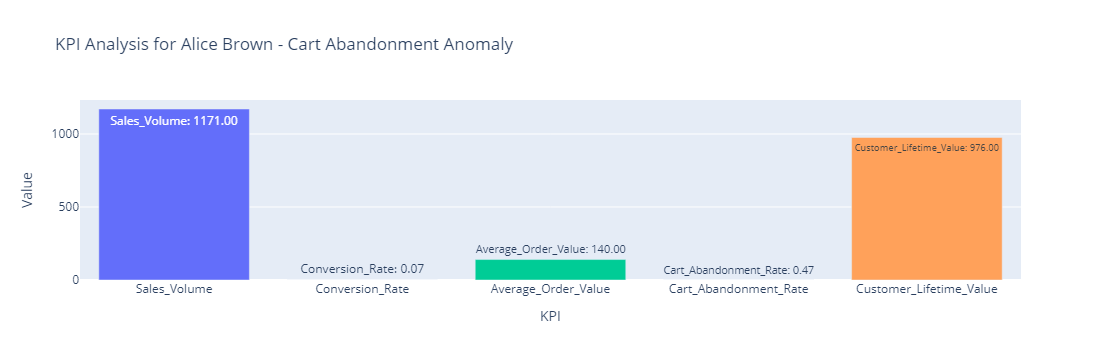

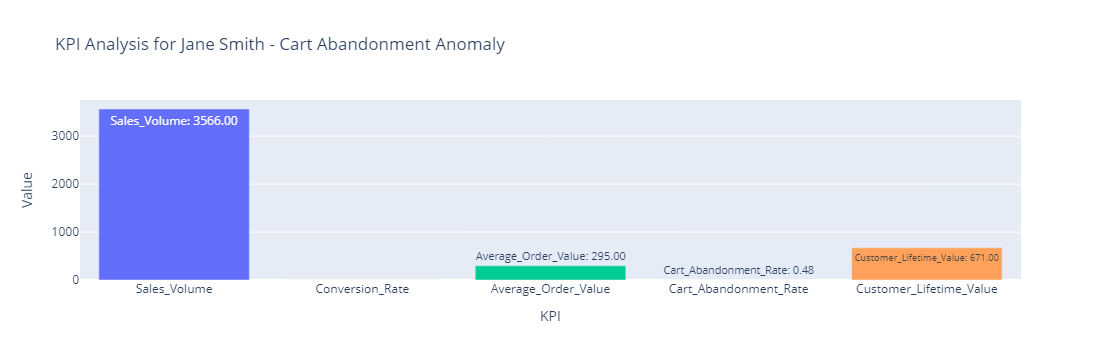

    Customer_ID Customer_Name       Customer_Email  Cart_Abandonment_Rate  \
16         1287   Chris White  alicebrown@mail.com                   0.50   
88         1322   Alice Brown  alicebrown@mail.com                   0.47   
90         1039    Jane Smith  chriswhite@mail.com                   0.48   

    Anomaly  
16       -1  
88       -1  
90       -1  


In [37]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.graph_objects as go

# Step 1: Data Generation
num_rows = 100
start_date = datetime(2024, 1, 1)
date_range = [start_date + timedelta(days=i) for i in range(num_rows)]

data = {
    "Date": date_range,
    "Site_ID": np.random.choice([1, 2, 3, 4, 5], size=num_rows),
    "Sales_Volume": np.random.randint(1000, 5000, size=num_rows),
    "Conversion_Rate": np.random.uniform(0.01, 0.10, size=num_rows).round(2),
    "Average_Order_Value": np.random.randint(50, 300, size=num_rows),
    "Cart_Abandonment_Rate": np.random.uniform(0.1, 0.5, size=num_rows).round(2),
    "Customer_Lifetime_Value": np.random.randint(200, 1000, size=num_rows),
    "Traffic_Source": np.random.choice(['Organic', 'Paid', 'Referral', 'Social Media'], size=num_rows),
    "Customer_ID": np.random.randint(1000, 2000, size=num_rows),
    "Customer_Name": np.random.choice(['John Doe', 'Jane Smith', 'Alice Brown', 'Bob Green', 'Chris White'], size=num_rows),
    "Customer_Email": np.random.choice(['johndoe@mail.com', 'janesmith@mail.com', 'alicebrown@mail.com', 'bobgreen@mail.com', 'chriswhite@mail.com'], size=num_rows)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Step 2: Anomaly Detection
# Encode categorical features
le = LabelEncoder()
df['Traffic_Source'] = le.fit_transform(df['Traffic_Source'])

# Select important KPIs for anomaly detection
kpis = [
    "Sales_Volume", "Conversion_Rate", "Average_Order_Value", "Cart_Abandonment_Rate",
    "Customer_Lifetime_Value"
]

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[kpis])

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df_scaled)

# Anomaly values: -1 means anomaly, 1 means normal
anomalies = df[df['Anomaly'] == -1]

# Step 3: Identify customers with anomalies in Cart Abandonment Rate
cart_abandonment_anomalies = anomalies[anomalies['Cart_Abandonment_Rate'] > 0.4]  # Assuming 0.4 is a high threshold

# Step 4: Visualize anomalies for faulty customers due to Cart Abandonment Rate using Plotly
for index, customer in cart_abandonment_anomalies.iterrows():
    fig = go.Figure()
    
    # Adding bars for each KPI
    for kpi in kpis:
        value = df.loc[df['Customer_ID'] == customer['Customer_ID'], kpi].values[0]
        fig.add_trace(go.Bar(
            x=[kpi],
            y=[value],
            hoverinfo='text',
            text=f'{kpi}: {value:.2f}',
            name=customer['Customer_Name']
        ))
    
    # Customize layout
    fig.update_layout(
        title=f"KPI Analysis for {customer['Customer_Name']} - Cart Abandonment Anomaly",
        xaxis_title="KPI",
        yaxis_title="Value",
        showlegend=False
    )
    
    fig.show()

# Step 5: Prepare final report for customers with high Cart Abandonment Rate
faulty_cart_abandonment_customers = cart_abandonment_anomalies[['Customer_ID', 'Customer_Name', 'Customer_Email', 'Cart_Abandonment_Rate', 'Anomaly']]

# Save the faulty customers with high Cart Abandonment Rate to a CSV file
faulty_cart_abandonment_customers.to_csv("faulty_customers_cart_abandonment.csv", index=False)

# Print the first few faulty customers due to Cart Abandonment Rate
print(faulty_cart_abandonment_customers.head())
